<a href="https://colab.research.google.com/github/fkhan98/Anti_Spoofing/blob/test-code/Texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

from google.colab.patches import cv2_imshow

In [ ]:
def lbp_basic(img):
    basic_array = np.zeros(img.shape,np.uint8)
    for i in range(basic_array.shape[0]-1):
        for j in range(basic_array.shape[1]-1):
            basic_array[i,j] = bin_to_decimal(cal_basic_lbp(img,i,j))
    return basic_array
def cal_basic_lbp(img,i,j):#Points larger than the center pixel are assigned a value of 1, and those smaller than the center pixel are assigned a value of 0. The binary sequence is returned
    sum = []
    if img[i - 1, j ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i - 1, j+1 ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i , j + 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j+1 ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i , j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i - 1, j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    return sum
def bin_to_decimal(bin):#Binary to decimal
    res = 0
    bit_num = 0 #Shift left
    for i in bin[::-1]:
        res += i << bit_num   # Shifting n bits to the left is equal to multiplying by 2 to the nth power
        bit_num += 1
    return res
def show_basic_hist(a): #Draw histogram of original lbp      
    hist = cv.calcHist([a],[0],None,[256],[0,256])
    hist = cv.normalize(hist,hist)
    plt.figure(figsize = (8,4))
    plt.plot(hist, color='r')
    plt.xlim([0,256])
    plt.show()

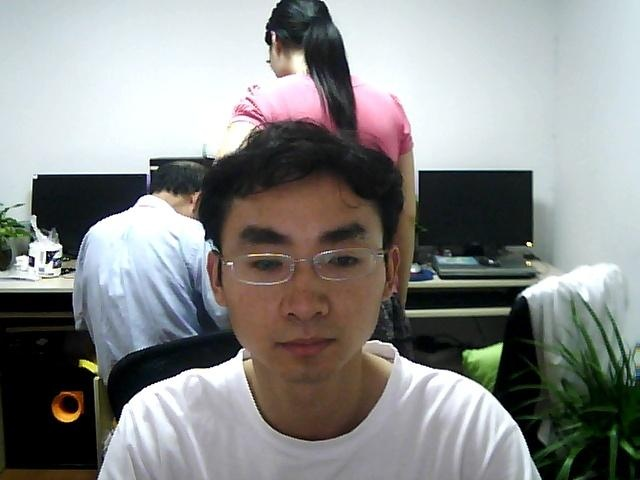

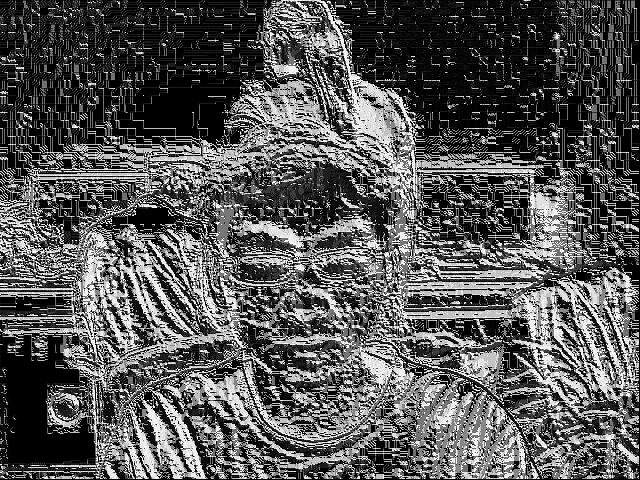

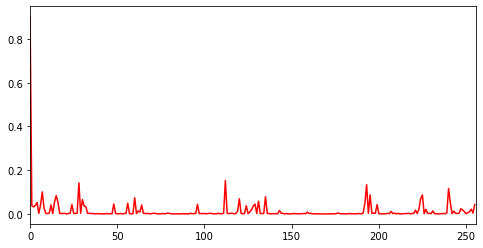

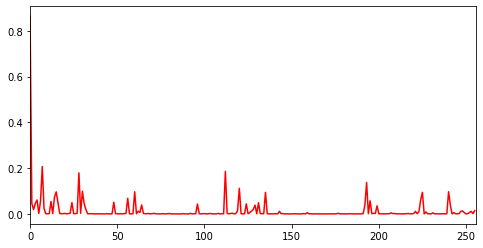

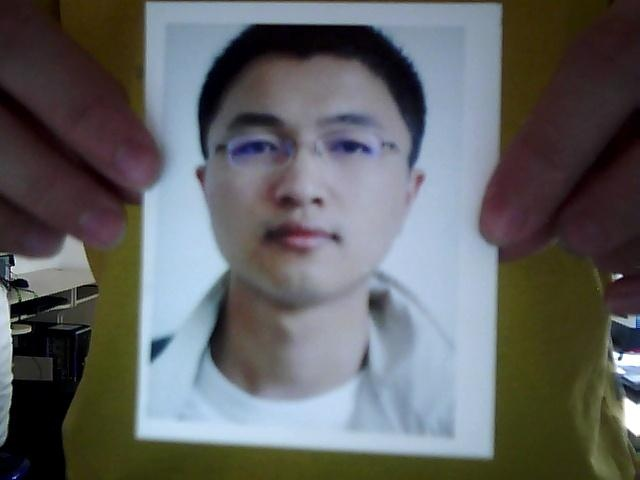

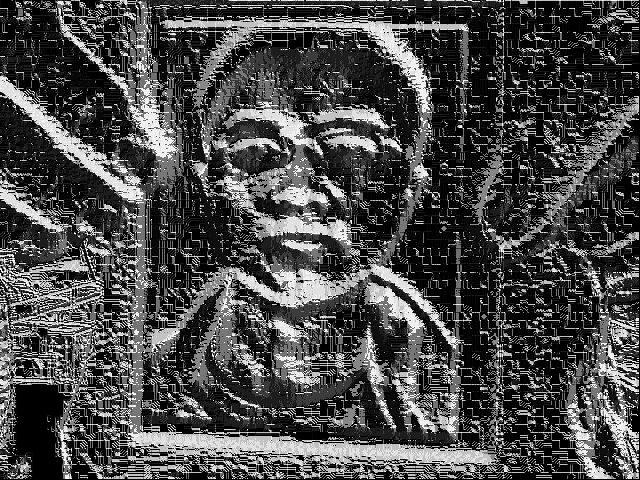

In [ ]:
img= cv.imread('/content/14.jpg',1)
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
basic_array = lbp_basic(img1)

cv2_imshow(img)
cv2_imshow(basic_array)
show_basic_hist(basic_array)

img2= cv.imread('/content/221.jpg',1)
img4 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
basic_array = lbp_basic(img4)
show_basic_hist(basic_array)
cv2_imshow(img2)
cv2_imshow(basic_array)
 

Rotation Invariant LBP

In [ ]:
from skimage import data
import cv2 as cv
import matplotlib.pyplot as plt
# revolve_map is a dictionary of 36 eigenvalues of rotation invariant pattern, which are serially numbered from small to large
revolve_map = {0: 0, 1: 1, 3: 2, 5: 3, 7: 4, 9: 5, 11: 6, 13: 7, 15: 8, 17: 9, 19: 10, 21: 11, 23: 12, 25: 13, 27: 14, 29: 15, 31: 16, 37: 17, 
39: 18, 43: 19, 45: 20, 47: 21, 51: 22, 53: 23,55: 24,59: 25, 61: 26, 63: 27, 85: 28, 87: 29, 91: 30, 95: 31, 111: 32, 119: 33, 127: 34, 
255: 35}
    
def lbp_revolve(img): #Image rotation invariant LBP feature
    revolve_array = np.zeros(img.shape,np.uint8)
    width = img.shape[0]
    height = img.shape[1]
    for i in range(1,width-1):
        for j in range(1,height-1):
            sum = cal_basic_lbp(img,i,j)
            revolve_key = get_min_for_revolve(sum)  #The minimum value of each rotation LBP binary string is obtained
            revolve_array[i, j] = revolve_map[revolve_key]  #Map the value range from 0 to 35
    return revolve_array

def cal_basic_lbp(img,i,j):#Points larger than the center pixel are assigned a value of 1, and those smaller than the center pixel are assigned a value of 0. The binary sequence is returned
    sum = []
    if img[i - 1, j ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i - 1, j+1 ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i , j + 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j+1 ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j ] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i + 1, j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i , j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    if img[i - 1, j - 1] > img[i, j]:
        sum.append(1)
    else:
        sum.append(0)
    return sum    
def get_min_for_revolve(arr): # The minimum decimal value of the new binary sequence can be obtained by continuously rotating the binary sequence
    values = [] #Store the value after each shift, and finally select the one with the smallest value
    circle = arr*2  # It is used for cyclic shift, and its corresponding decimal system is calculated respectively
    for i in range(0,8):
        j = 0
        sum = 0
        bit_sum = 0
        while j < 8:
            sum += circle[i+j] << bit_sum
            bit_sum += 1
            j += 1
        values.append(sum)
    return min(values)
 # Drawing normalized statistical histogram of image rotation invariant LBP features
def show_revolve_hist(img_array):
    show_hist(img_array, [36], [0, 36])
def show_hist(img_array,im_bins,im_range):
    hist = cv.calcHist([img_array], [0], None, im_bins, im_range)
    hist = cv.normalize(hist, hist).flatten()
    plt.plot(hist, color='r')
    plt.xlim(im_range)
    plt.show()


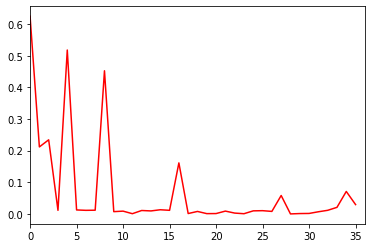

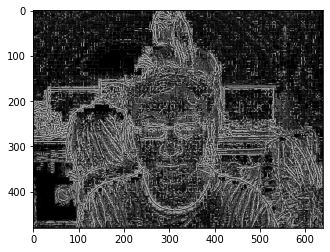

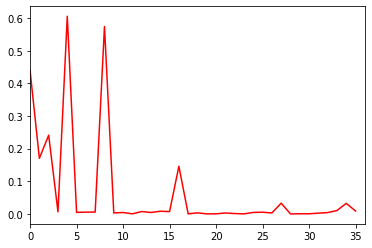

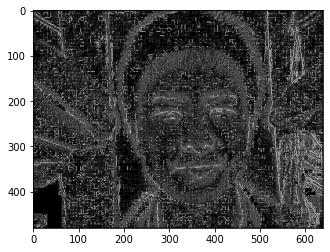

In [ ]:
img = cv.imread('/content/14.jpg',1)
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
re_arr = lbp_revolve(img1)
show_revolve_hist(re_arr)
plt.imshow(re_arr, cmap='Greys_r')
plt.show()
img = cv.imread('/content/28.jpg',1)
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
re_arr = lbp_revolve(img1)
show_revolve_hist(re_arr)
plt.imshow(re_arr, cmap='Greys_r')
plt.show()

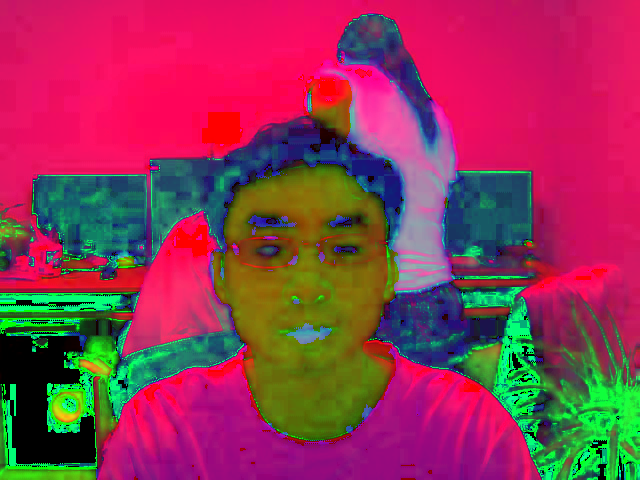

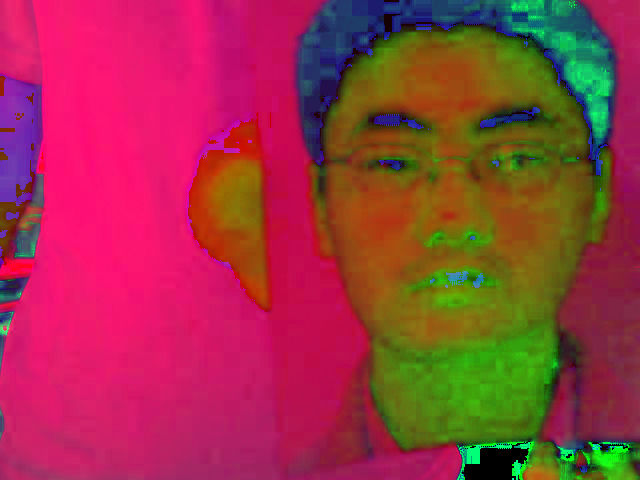

In [ ]:
img = cv2.imread('/content/real.jpg',1)
image_real = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(image_real)
img = cv2.imread('/content/spoof.jpg',1)
image_spoof = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(image_spoof)

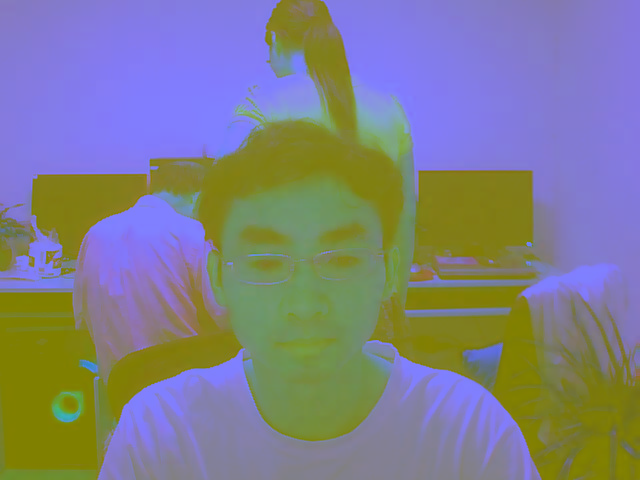

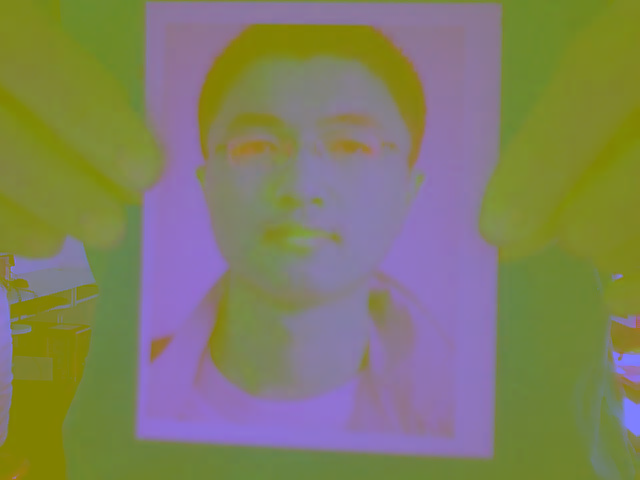

In [ ]:
img = cv.imread('/content/14.jpg',1)
image_real = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
cv2_imshow(image_real)
img = cv.imread('/content/221.jpg',1)
image_spoof = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
cv2_imshow(image_spoof)

#Equivalent LBP

In [ ]:
# uniform_map is a dictionary of 58 eigenvalues of equivalent pattern, which are serialized and numbered from small to large
uniform_map = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6, 8: 7, 12: 8,14: 9, 15: 10, 16: 11, 24: 12, 28: 13, 30: 14, 31: 15, 32: 16, 48: 17,
 56: 18, 60: 19, 62: 20, 63: 21, 64: 22, 96: 23, 112: 24,120: 25, 124: 26, 126: 27, 127: 28, 128: 29, 129: 30, 131: 31, 135: 32,143: 33,
 159: 34, 191: 35, 192: 36, 193: 37, 195: 38, 199: 39, 207: 40,223: 41, 224: 42, 225: 43, 227: 44, 231: 45, 239: 46, 240: 47, 241: 48,
243: 49, 247: 50, 248: 51, 249: 52, 251: 53, 252: 54, 253: 55, 254: 56,255: 57}
def lbp_uniform(img):
    revolve_array = np.zeros(img.shape,np.uint8)
    width = img.shape[0]
    height = img.shape[1]
    for i in range(1,width-1):
        for j in range(1,height-1):
            sum_ = cal_basic_lbp(img,i,j) #Get binary
            num_ = calc_sum(sum_)  #Get jump times
            if num_ <= 2:
                revolve_array[i,j] = uniform_map[bin_to_decimal(sum_)] #If the number of jumps is less than or equal to 2, the decimal value corresponding to the binary sequence is the LBP value in the center of the neighborhood. There are only 58 possible values, but the maximum value can be 255, so the mapping is carried out here.
            else:
                revolve_array[i,j] = 58
    return revolve_array
def calc_sum(r):  # Gets the number of jumps in the binary of the value r
    sum_ = 0
    for i in range(0,len(r)-1):
        if(r[i] != r[i+1]):
            sum_ += 1
    return sum_
def show_uniform_hist(img_array):
    show_hist(img_array, [60], [0, 60])
def show_hist(img_array,im_bins,im_range):
    hist = cv.calcHist([img_array], [0], None, im_bins, im_range)
    hist = cv.normalize(hist, hist).flatten()
    plt.plot(hist, color='r')
    plt.xlim(im_range)
    plt.show()

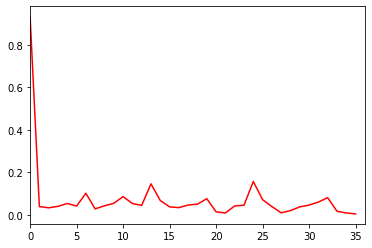

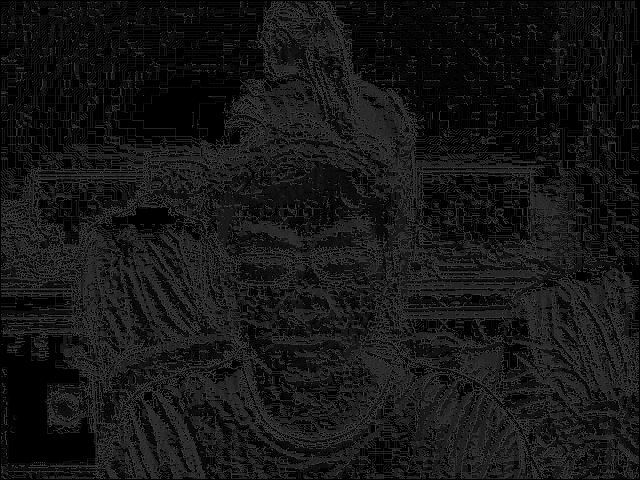

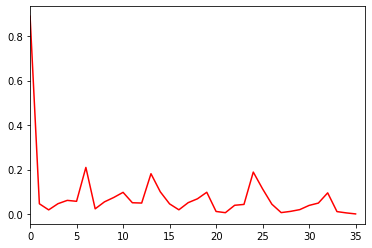

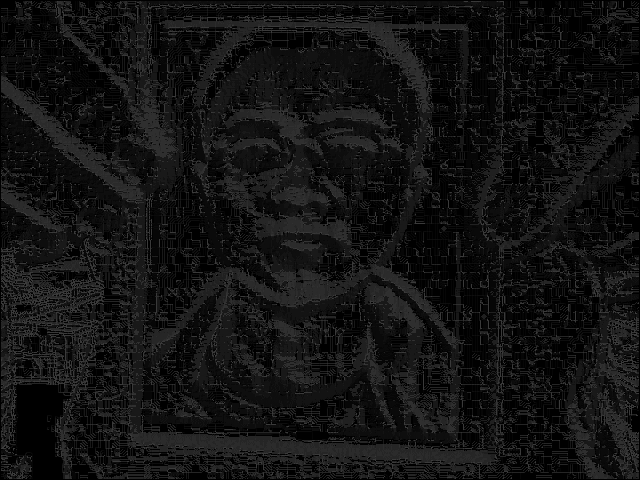

In [ ]:
img = cv.imread('/content/14.jpg',1)
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
uniform_array = lbp_uniform(img1)
show_revolve_hist(uniform_array)
cv2_imshow(uniform_array)
img = cv.imread('/content/221.jpg',1)
img1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
uniform_array = lbp_uniform(img1)
show_revolve_hist(uniform_array)
cv2_imshow(uniform_array)

#HOG

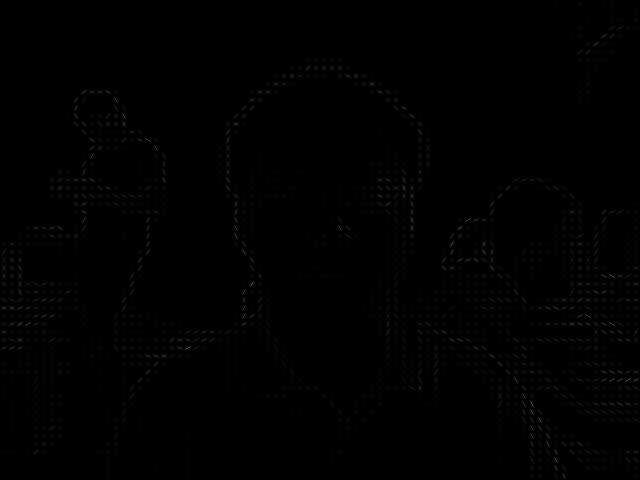

[0.21919368 0.         0.10433197 ... 0.20290372 0.33923222 0.33923222]


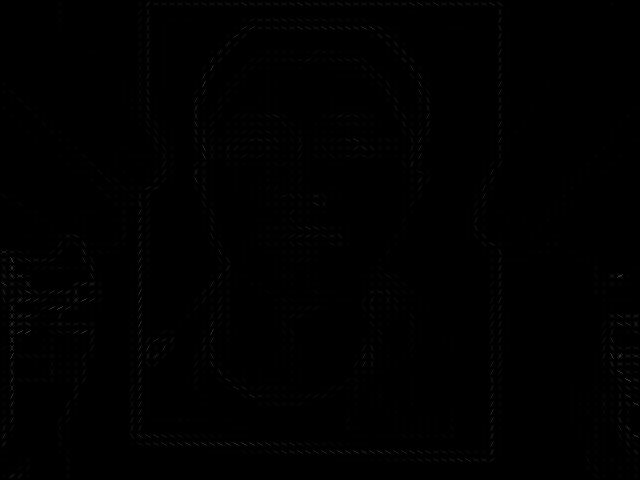

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt


img = cv2.imread('/content/799.jpg',1)
#creating hog features 
fd, hog_image = hog(img, orientations=4, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
cv2_imshow(hog_image)
print(fd)
img = cv2.imread('/content/221.jpg',1)
#creating hog features 
fd, hog_image = hog(img, orientations=4, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
cv2_imshow(hog_image)

#DOG

In [ ]:

import cv2
import numpy as np
from scipy import signal
def DOG(image):
  #Image height and width
  h,w = image.shape[:2] 
  #operator
  sigma=2
  K = 1.1
  g1 = cv2.GaussianBlur(image, (23,23), sigmaX=sigma,sigmaY=sigma)
  g2 = cv2.GaussianBlur(image, (23,23), sigmaX=sigma*K,sigmaY=sigma*K)
  
  DOG = g2 - g1
  # DOG[DOG>0]=255
  # DOG[DOG<=0]=0
  DOG = DOG.astype(np.uint8)
  cv2_imshow(DOG)
  
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  return DOG

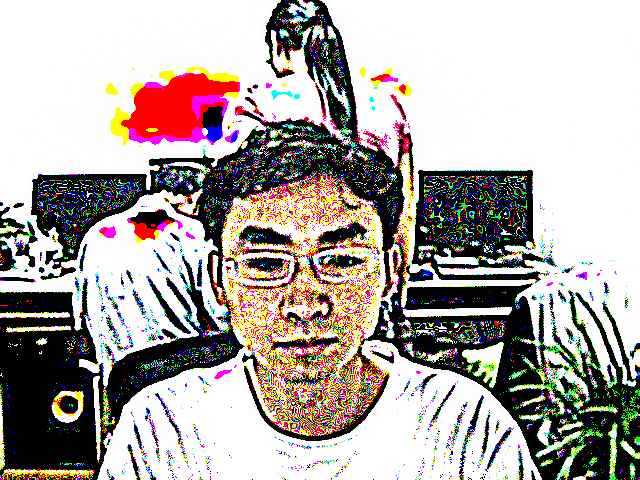

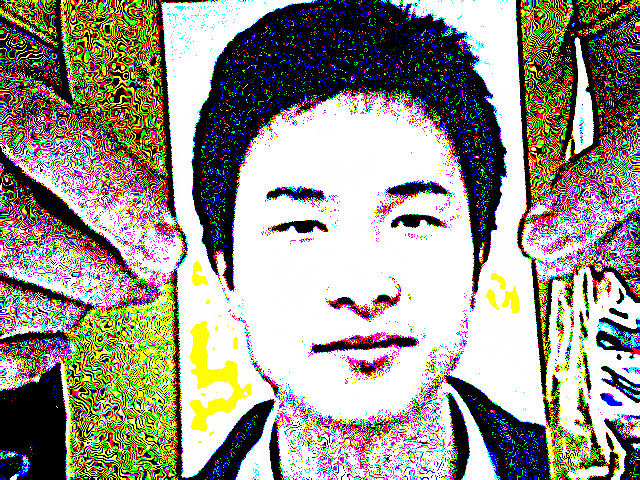

In [ ]:
img_real = cv2.imread('/content/14.jpg')
dog_img_real = DOG(img_real)

img_spoof = cv2.imread('/content/28.jpg')
dog_img_spoof = DOG(img_spoof)

#DOG+LBPV

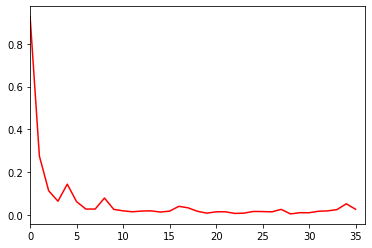

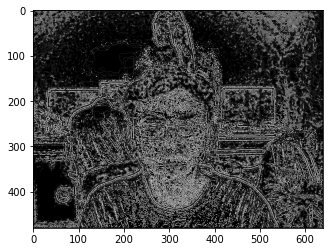

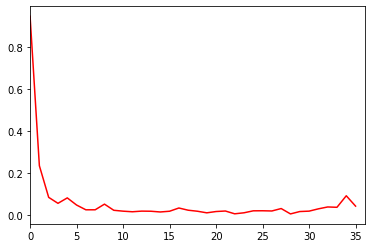

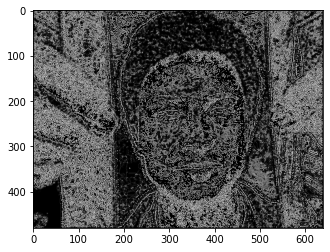

In [ ]:
img1 = cv2.cvtColor(dog_img_real,cv2.COLOR_BGR2GRAY)
#cv2_imshow(img1)
re_arr = lbp_revolve(img1)
show_revolve_hist(re_arr)
plt.imshow(re_arr, cmap='Greys_r')
plt.show()

img1 = cv2.cvtColor(dog_img_spoof,cv2.COLOR_BGR2GRAY)
re_arr = lbp_revolve(img1)
show_revolve_hist(re_arr)
plt.imshow(re_arr, cmap='Greys_r')
plt.show()

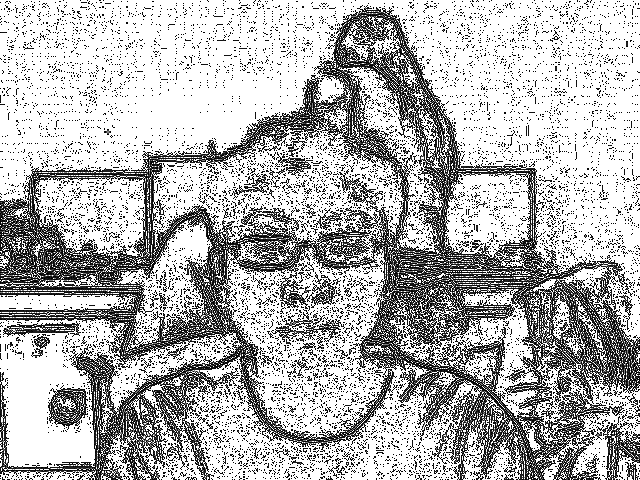

In [ ]:
# Apply 3x3 and 7x7 Gaussian blur
img = cv2.imread('/content/real.jpg',0)
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)
    
    # Calculate the DoG by subtracting
dog = low_sigma - high_sigma
processed_image = feature.local_binary_pattern(dog, 8, 1, method='ror')
cv2_imshow(processed_image)

#BUILTIN LBP 

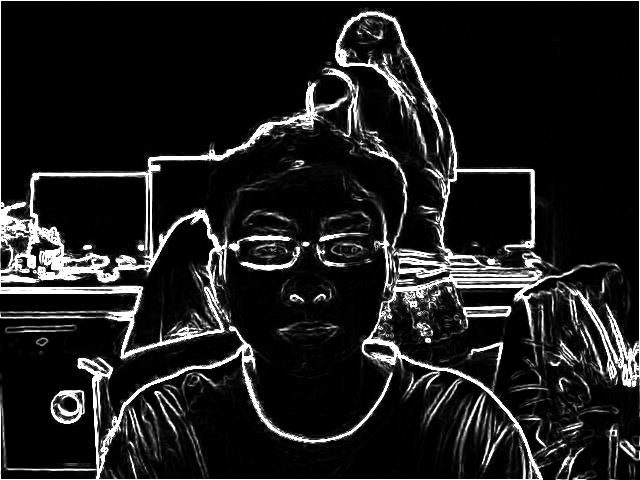

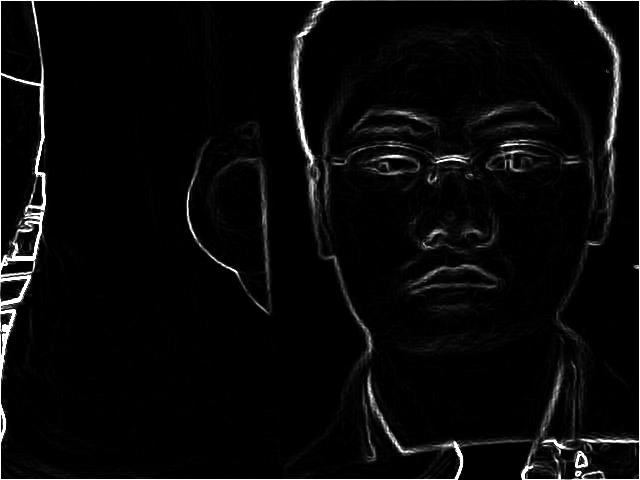

In [ ]:
import skimage
from skimage import feature
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/real.jpg',0)
img2 = skimage.feature.local_binary_pattern(img, 8, 1, method='var')
cv2_imshow(img2)
img = cv2.imread('/content/spoof.jpg',0)
img2 = skimage.feature.local_binary_pattern(img, 8, 1, method='var')
cv2_imshow(img2)

#BUILT IN LBP + DOG